A comparative analysis on music recommendation system using different ML models for predicting song popularity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
directory = "/content/drive/MyDrive/CSE 422 Project"
os.chdir(directory)

In [ ]:
import pandas as pd

df = pd.read_csv("Dataset.csv")

In [ ]:
# Dataset

df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157.0,30.0,53.0,-14.0,11.0,68.0,201.0,94.0,3,71
1,2,Black Night,Deep Purple,album rock,2000,135.0,79.0,50.0,-11.0,17.0,81.0,207.0,17.0,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168.0,69.0,66.0,-9.0,7.0,52.0,341.0,2.0,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173.0,96.0,43.0,-4.0,3.0,37.0,269.0,0.0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106.0,82.0,58.0,-5.0,10.0,87.0,256.0,1.0,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,1055,Hart Van Mijn Gevoel,De Kast,dutch pop,1999,140.0,43.0,44.0,-10.0,14.0,26.0,269.0,54.0,3,44
1055,1056,Smooth (feat. Rob Thomas),Santana,blues rock,1999,116.0,92.0,61.0,-4.0,30.0,96.0,295.0,16.0,3,70
1056,1057,My Name Is,Eminem,detroit hip hop,1999,86.0,68.0,87.0,-6.0,9.0,82.0,NaN,4.0,32,72
1057,1058,Desert Rose,Sting,permanent wave,1999,112.0,65.0,58.0,-8.0,11.0,13.0,286.0,1.0,3,52


In [ ]:
# Printing the number of instances and features in the dataset

print("Number of instances on the dataset:", df.shape[0]-1)
print("Number of features on the datatset:", df.shape[1])

Number of instances on the dataset: 1058
Number of features on the datatset: 15


In [ ]:
# Types of features

df.dtypes

Index                       int64
Title                      object
Artist                     object
Top Genre                  object
Year                        int64
Beats Per Minute (BPM)    float64
Energy                    float64
Danceability              float64
Loudness (dB)             float64
Liveness                  float64
Valence                   float64
Length (Duration)         float64
Acousticness              float64
Speechiness                 int64
Popularity                  int64
dtype: object

<ipython-input-10-922d2a5f879d>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


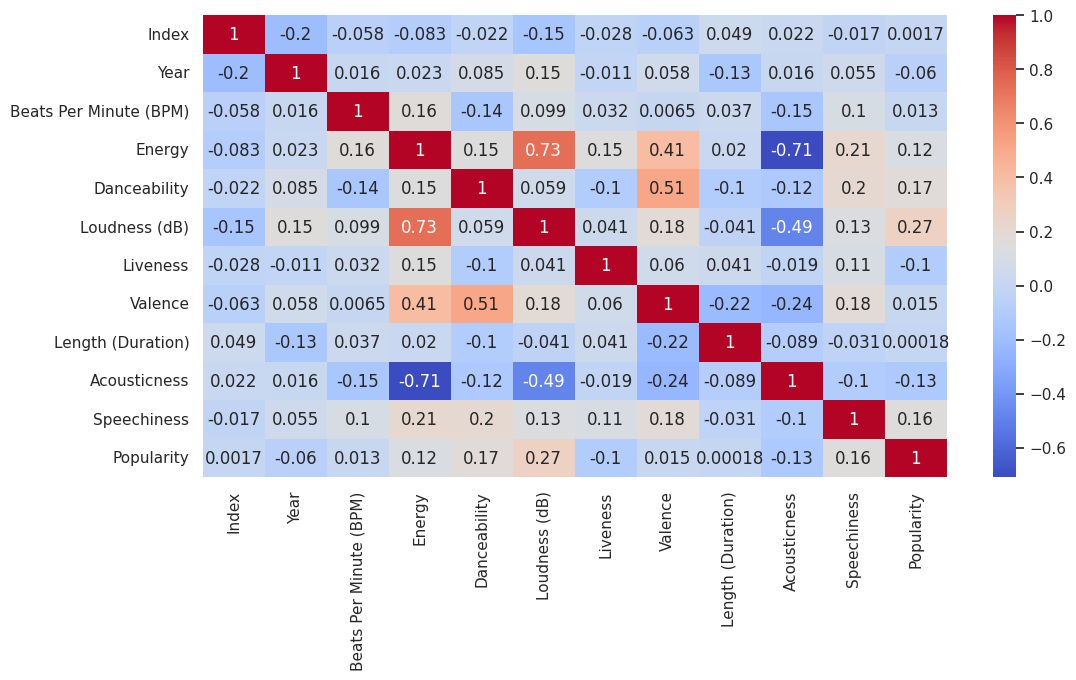

In [ ]:
# Showing initial correlation between features

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, cmap="coolwarm",annot=True)

Data Pre-processing

In [ ]:
# Checking null values in the features

df.isnull()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1055,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1056,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1057,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.shape

(1059, 15)

In [ ]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    2
Energy                    4
Danceability              2
Loudness (dB)             2
Liveness                  1
Valence                   2
Length (Duration)         5
Acousticness              2
Speechiness               0
Popularity                0
dtype: int64

In [ ]:
# Features having NaN values

nan_attr = 0
for e in df.isnull().sum():
  if e>0:
    nan_attr += 1

print(nan_attr)

8


In [ ]:
# Data size after droping NaN values

df = df.dropna()
df.shape

(1039, 15)

In [ ]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [ ]:
# Checking duplicate values
df.duplicated().sum()


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1052    False
1054    False
1055    False
1057    False
1058    False
Length: 1039, dtype: bool>

In [ ]:
# For Scaling and Predictions

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models to be used

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression




In [ ]:
# Droping unnecessary features

df = df.drop(labels=['Index', 'Title'], axis=1)
df.shape

(1039, 13)

In [ ]:
df.pop("Top Genre")

0           adult standards
1                album rock
2       alternative hip hop
3         alternative metal
4              classic rock
               ...         
1052               pop punk
1054              dutch pop
1055             blues rock
1057         permanent wave
1058      alternative dance
Name: Top Genre, Length: 1039, dtype: object

Showing popularity based on artist

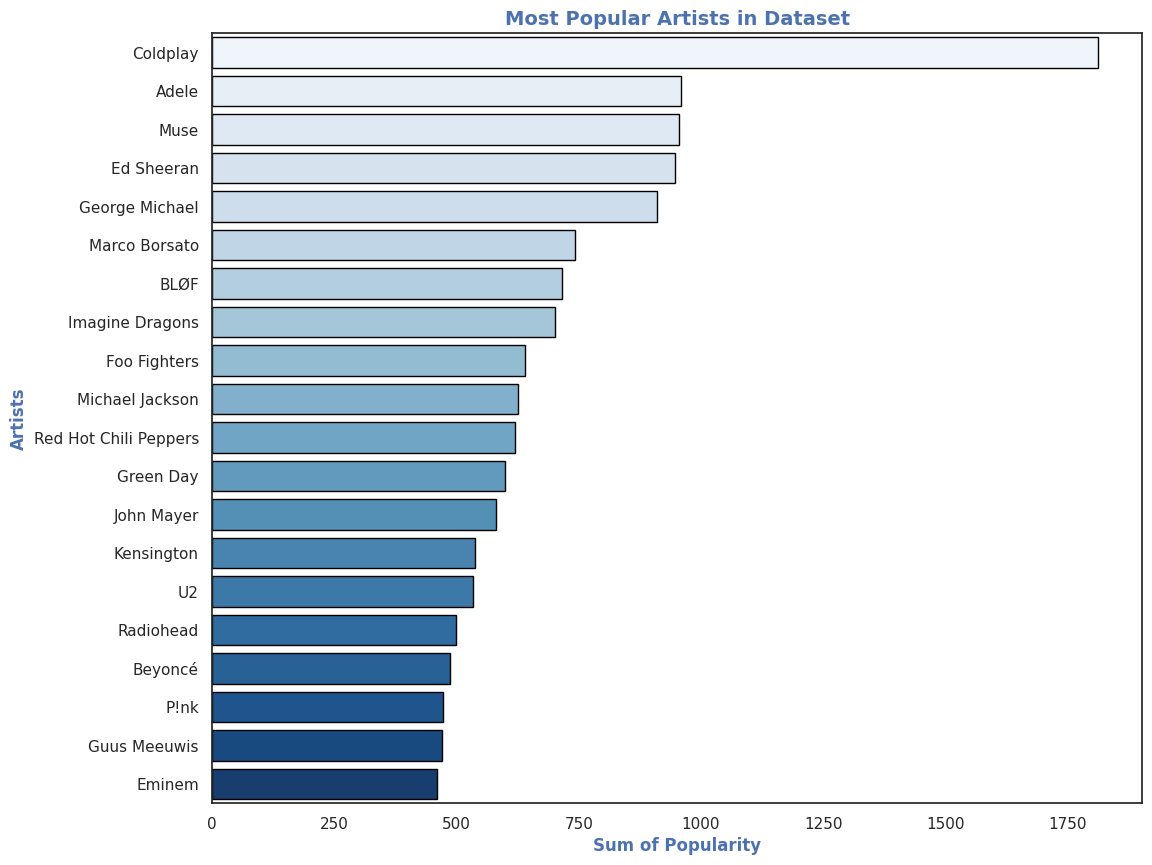

In [ ]:
# Artists

fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df.groupby('Artist')['Popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', c='b', fontsize=12, weight='bold')
ax.set_ylabel('Artists', c='b', fontsize=12, weight='bold')
ax.set_title('Most Popular Artists in Dataset', c='b', fontsize=14, weight = 'bold')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1058
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Artist                  1039 non-null   object 
 1   Year                    1039 non-null   int64  
 2   Beats Per Minute (BPM)  1039 non-null   float64
 3   Energy                  1039 non-null   float64
 4   Danceability            1039 non-null   float64
 5   Loudness (dB)           1039 non-null   float64
 6   Liveness                1039 non-null   float64
 7   Valence                 1039 non-null   float64
 8   Length (Duration)       1039 non-null   float64
 9   Acousticness            1039 non-null   float64
 10  Speechiness             1039 non-null   int64  
 11  Popularity              1039 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 105.5+ KB


Target Selection: "Popularity"

In [ ]:
# Target

df['Popularity'].describe()

count    1039.000000
mean       57.719923
std        16.109258
min        11.000000
25%        46.000000
50%        59.000000
75%        71.000000
max       100.000000
Name: Popularity, dtype: float64

Text(0.5, 1.0, 'Popularity Distribution')

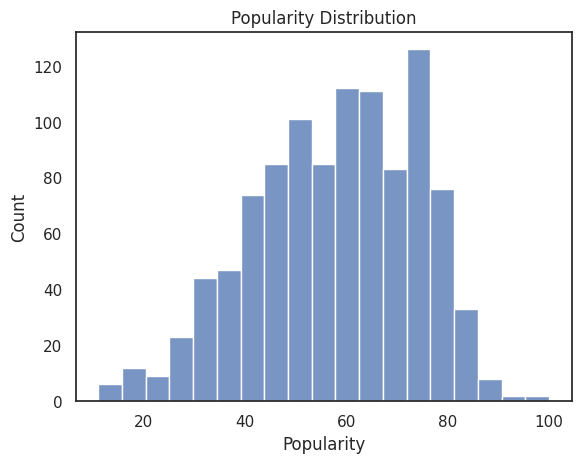

In [ ]:
sns.histplot(df['Popularity']).set_title('Popularity Distribution')

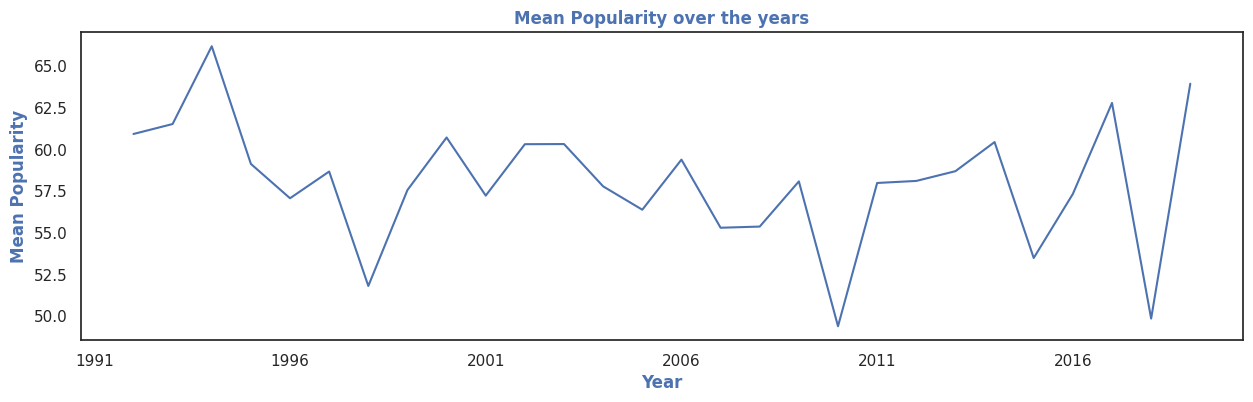

In [ ]:

fig, ax = plt.subplots(figsize=(15, 4))
ax = df.groupby('Year')['Popularity'].mean().plot()
ax.set_title('Mean Popularity over the years', c='b', weight='bold')
ax.set_ylabel('Mean Popularity', c='b', weight='bold')
ax.set_xlabel('Year', c='b', weight='bold')
ax.set_xticks(range(1991, 2021, 5))
plt.show()

In [ ]:
df['Popularity'] = pd.qcut(df['Popularity'], q=2, labels=[0, 1])

In [ ]:
df["Popularity"].value_counts()

0    542
1    497
Name: Popularity, dtype: int64

In [ ]:
df['Popularity']

0       1
1       0
2       1
3       1
4       0
       ..
1052    1
1054    0
1055    1
1057    0
1058    1
Name: Popularity, Length: 1039, dtype: category
Categories (2, int64): [0 < 1]

In [ ]:
# Encoding Artists as it contains string datatype

from sklearn.preprocessing import OneHotEncoder

def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
df = onehot_encode(df, 'Artist', 'artist')

In [ ]:
df

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,...,artist_Within Temptation,artist_Wolfmother,artist_Womack & Womack,artist_Xavier Rudd,artist_Yann Tiersen,artist_Youp van 't Hek,artist_Youssou N'Dour,artist_ZZ Top,artist_Zucchero,artist_blink-182
0,2004,157.0,30.0,53.0,-14.0,11.0,68.0,201.0,94.0,3,...,0,0,0,0,0,0,0,0,0,0
1,2000,135.0,79.0,50.0,-11.0,17.0,81.0,207.0,17.0,7,...,0,0,0,0,0,0,0,0,0,0
2,2001,168.0,69.0,66.0,-9.0,7.0,52.0,341.0,2.0,17,...,0,0,0,0,0,0,0,0,0,0
3,2007,173.0,96.0,43.0,-4.0,3.0,37.0,269.0,0.0,4,...,0,0,0,0,0,0,0,0,0,0
4,2002,106.0,82.0,58.0,-5.0,10.0,87.0,256.0,1.0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,1999,149.0,90.0,43.0,-5.0,61.0,68.0,167.0,1.0,5,...,0,0,0,0,0,0,0,0,0,1
1054,1999,140.0,43.0,44.0,-10.0,14.0,26.0,269.0,54.0,3,...,0,0,0,0,0,0,0,0,0,0
1055,1999,116.0,92.0,61.0,-4.0,30.0,96.0,295.0,16.0,3,...,0,0,0,0,0,0,0,0,0,0
1057,1999,112.0,65.0,58.0,-8.0,11.0,13.0,286.0,1.0,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Exporting the Pre-Processed dataset

from google.colab import files
df.to_csv('pre_processed.csv', encoding='utf-8', index=False)
#files.download('pre_processed.csv')

 Target Scaling: "Popularity"

In [ ]:
y = df.loc[:, 'Popularity']
X = df.drop('Popularity', axis=1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
print(X)

[[-0.29144064  1.28905296 -1.47249144 ... -0.04391629 -0.03103854
  -0.03103854]
 [-0.80467255  0.51591207  0.79357505 ... -0.04391629 -0.03103854
  -0.03103854]
 [-0.67636457  1.67562341  0.3311125  ... -0.04391629 -0.03103854
  -0.03103854]
 ...
 [-0.93298052 -0.15180052  1.39477637 ... -0.04391629 -0.03103854
  -0.03103854]
 [-0.93298052 -0.29237159  0.14612748 ... -0.04391629 -0.03103854
  -0.03103854]
 [-0.93298052  0.23476993  1.39477637 ... -0.04391629 -0.03103854
  -0.03103854]]


Spliting target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [ ]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (831, 503)
X_test:  (208, 503)
y_train:  (831,)
y_test:  (208,)


In [ ]:
# Models

log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dec_model = DecisionTreeClassifier()
svm_model = SVC()

In [ ]:
# Fitting into models

log_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dec_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Calculating Accuracy

knn_acc = knn_model.score(X_test, y_test) # KNN
dec_acc = dec_model.score(X_test, y_test) # Descision Tree
svm_acc = svm_model.score(X_test,y_test)  # SVM
log_acc = log_model.score(X_test, y_test) # Logistic Regression


In [ ]:
# Accuracy Score

print("K-Nearest-Neighbors Accuracy:", knn_acc)
print("Decision Tree Accuracy:", dec_acc)
print("SVM Classifier Accuracy:", svm_acc)
print("Logistic Regression Accuracy:", log_acc)

K-Nearest-Neighbors Accuracy: 0.6875
Decision Tree Accuracy: 0.5721153846153846
SVM Classifier Accuracy: 0.6875
Logistic Regression Accuracy: 0.7451923076923077


In [ ]:
# Accuracy comparison between models

import plotly.express as px
fig = px.bar(
    x=["K-Nearest-Neighbors", "Decision Tree", "SVM", "Logistic Regression"],
    y=[knn_acc, dec_acc, svm_acc,log_acc ],
    color=["K-Nearest-Neighbors", "Decision Tree", "SVM", "Logistic Regression"],
    labels={'x': "Models", 'y': "Accuracy"},
    title="Model Accuracy Comparison"
)

fig.show()

In [ ]:
# Calculating Error Rate

knn_error = 1 - knn_acc
dec_error = 1 - dec_acc
svm_error = 1 - svm_acc
log_error = 1 - log_acc

print(f"KNN error: {knn_error}")
print(f"Decision Tree error: {dec_error}")
print(f"SVM error: {svm_error}")
print(f"Logistic Regression error: {log_error}")

KNN error: 0.3125
Decision Tree error: 0.4278846153846154
SVM error: 0.3125
Logistic Regression error: 0.2548076923076923


In [ ]:
# Error Rate comparison between models

import plotly.express as px
fig = px.bar(
    x=["K-Nearest-Neighbors", "Decision Tree", "SVM", "Logistic Regression"],
    y=[knn_error, dec_error, svm_error, log_error],
    color=["K-Nearest-Neighbors", "Decision Tree", "SVM", "Logistic Regression"],
    labels={'x': "Models", 'y': "Error Rate"},
    title="Error Rate Comparison"
)

fig.show()